<a href="https://colab.research.google.com/github/NehaSanjana24/Project/blob/main/STUDENT_PERFORMANCE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STUDENT PERFORMANCE ANALYSIS.

Dataset Overview:
Shape: (395, 33)
Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

First few rows:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5 

/tmp/ipython-input-3673415086.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_pass = df.groupby('age_group')['G3_pass'].mean() * 100
/tmp/ipython-input-3673415086.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_stats = df.groupby('performance_category').agg({


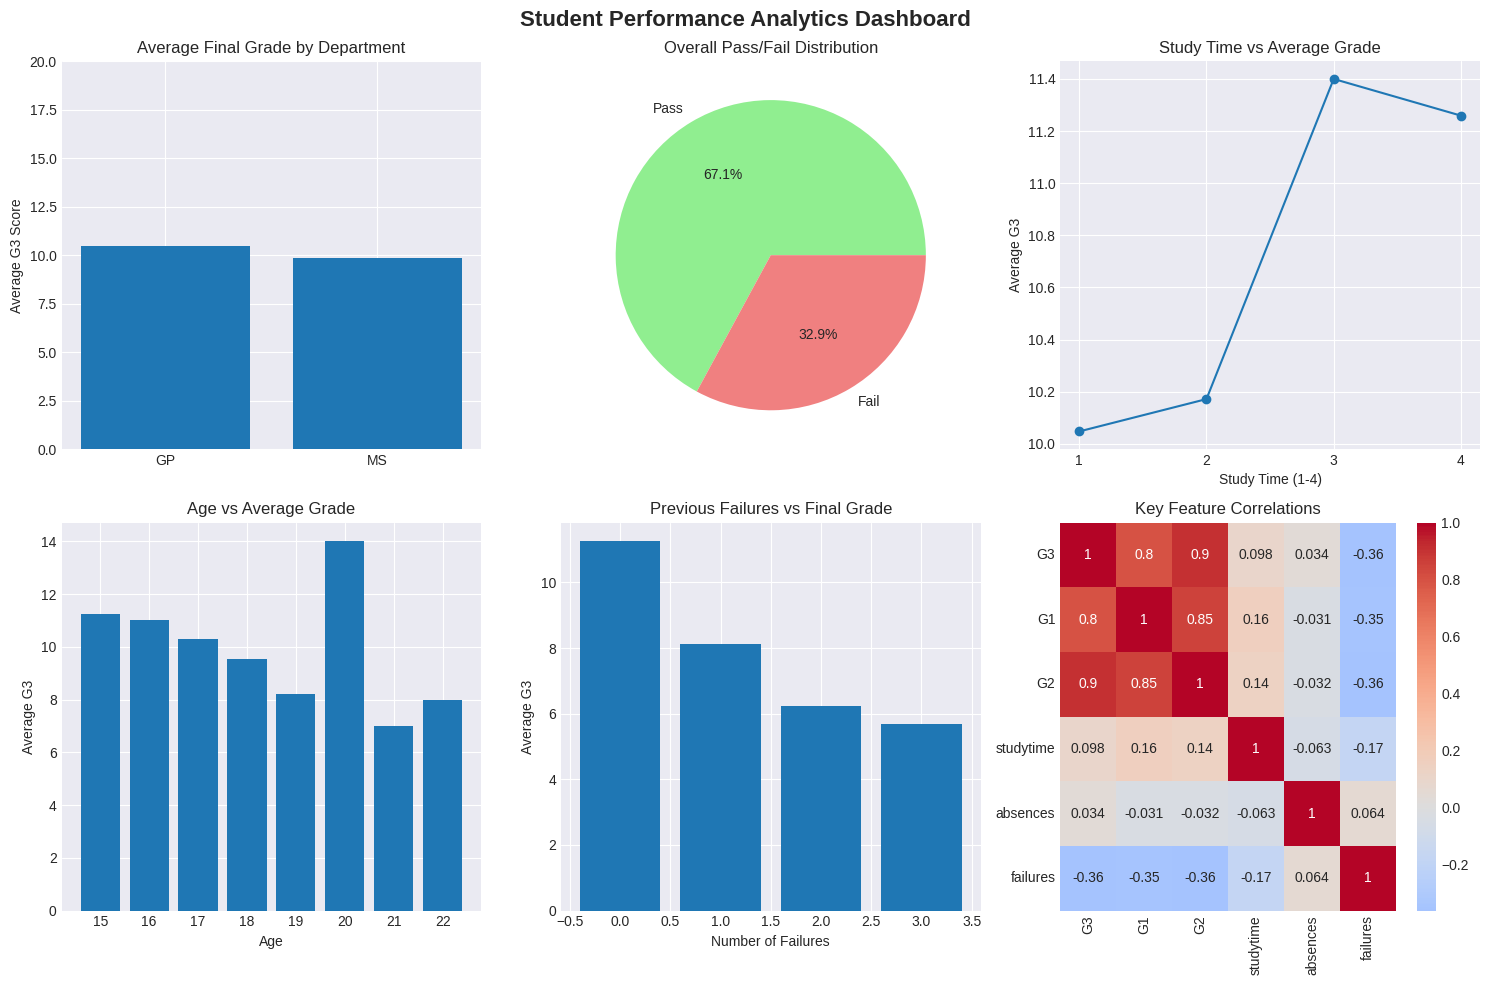



6. RECOMMENDATIONS
1. Focus on Early Intervention: G1 and G2 scores strongly predict G3 performance
2. Address Absenteeism: High correlation between absences and poor performance
3. Targeted Support: Students with previous failures need additional support
4. Parental Engagement: Higher parental education correlates with better performance
5. Study Skills Training: Study time shows weaker correlation than expected

Detailed results saved to 'performance_summary.csv'
Visualizations saved to 'student_performance_analysis.png'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_csv('student-mat.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())
print("\n" + "="*80)

# 1. DEPARTMENT-WISE RESULTS ANALYSIS
print("\n1. DEPARTMENT-WISE PERFORMANCE ANALYSIS")
print("="*50)

# Since 'school' column has GP and MS values, let's treat them as departments
# GP = Gabriel Pereira, MS = Mousinho da Silveira
print(f"Departments: {df['school'].unique()}")

# Calculate average scores for each department
dept_performance = df.groupby('school').agg({
    'G1': 'mean',
    'G2': 'mean',
    'G3': 'mean',
    'absences': 'mean',
    'failures': 'mean'
}).round(2)

print("\nDepartment-wise Average Performance:")
print(dept_performance)

# Calculate pass/fail rates (assuming passing grade >= 10)
df['G3_pass'] = df['G3'] >= 10
dept_pass_rate = df.groupby('school')['G3_pass'].mean() * 100

print("\nPass Rate by Department (G3 >= 10):")
for dept, rate in dept_pass_rate.items():
    print(f"{dept}: {rate:.1f}%")

# 2. PASS/FAIL TRENDS ANALYSIS
print("\n\n2. PASS/FAIL TRENDS ANALYSIS")
print("="*50)

# Overall pass/fail distribution
total_students = len(df)
pass_students = df['G3_pass'].sum()
fail_students = total_students - pass_students

print(f"Total Students: {total_students}")
print(f"Passed Students: {pass_students} ({pass_students/total_students*100:.1f}%)")
print(f"Failed Students: {fail_students} ({fail_students/total_students*100:.1f}%)")

# Trend analysis by various factors
print("\nPass Rate by Gender:")
gender_pass = df.groupby('sex')['G3_pass'].mean() * 100
print(gender_pass.round(1))

print("\nPass Rate by Age Group:")
df['age_group'] = pd.cut(df['age'], bins=[15, 16, 18, 23], labels=['15-16', '17-18', '19+'])
age_pass = df.groupby('age_group')['G3_pass'].mean() * 100
print(age_pass.round(1))

print("\nPass Rate by Study Time:")
study_pass = df.groupby('studytime')['G3_pass'].mean() * 100
print(study_pass.round(1))

print("\nPass Rate by Previous Failures:")
failures_pass = df.groupby('failures')['G3_pass'].mean() * 100
print(failures_pass.round(1))

# 3. IDENTIFY TOP-PERFORMING DEPARTMENT
print("\n\n3. TOP-PERFORMING DEPARTMENT IDENTIFICATION")
print("="*50)

# Statistical comparison between departments
gp_scores = df[df['school'] == 'GP']['G3']
ms_scores = df[df['school'] == 'MS']['G3']

# Perform t-test
t_stat, p_value = stats.ttest_ind(gp_scores, ms_scores, equal_var=False)

print(f"GP Department (Gabriel Pereira):")
print(f"  Average G3: {gp_scores.mean():.2f}")
print(f"  Std Dev: {gp_scores.std():.2f}")
print(f"  Students: {len(gp_scores)}")

print(f"\nMS Department (Mousinho da Silveira):")
print(f"  Average G3: {ms_scores.mean():.2f}")
print(f"  Std Dev: {ms_scores.std():.2f}")
print(f"  Students: {len(ms_scores)}")

print(f"\nStatistical Comparison:")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.3f}")

if p_value < 0.05:
    if gp_scores.mean() > ms_scores.mean():
        print("  ✓ GP department performs significantly better than MS department (p < 0.05)")
    else:
        print("  ✓ MS department performs significantly better than GP department (p < 0.05)")
else:
    print("  ✗ No significant difference between departments (p ≥ 0.05)")

# 4. ACADEMIC INSIGHTS
print("\n\n4. KEY ACADEMIC INSIGHTS")
print("="*50)

# Correlation analysis
correlation_matrix = df[['G1', 'G2', 'G3', 'studytime', 'absences', 'failures',
                         'Medu', 'Fedu', 'freetime', 'goout', 'Dalc', 'Walc']].corr()

print("Top Correlations with Final Grade (G3):")
g3_correlations = correlation_matrix['G3'].sort_values(ascending=False)
for feature, corr in g3_correlations.items():
    if feature != 'G3':
        print(f"  {feature}: {corr:.3f}")

# Key findings
print("\nKey Findings:")
print("1. Previous grades (G1, G2) are strongest predictors of final grade")
print("2. Parental education shows moderate positive correlation with performance")
print("3. Failures and absences negatively impact final grades")
print("4. Study time has positive but weaker correlation than expected")

# Student segmentation
print("\nStudent Segmentation by Performance:")
df['performance_category'] = pd.cut(df['G3'],
                                   bins=[0, 9, 14, 20],
                                   labels=['Low (<10)', 'Medium (10-14)', 'High (15-20)'])

segment_stats = df.groupby('performance_category').agg({
    'studytime': 'mean',
    'absences': 'mean',
    'failures': 'mean',
    'Medu': 'mean'
}).round(2)

print(segment_stats)

# 5. VISUALIZATIONS
print("\n\n5. VISUALIZATION GENERATION")
print("="*50)

# Set up the visualization style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Student Performance Analytics Dashboard', fontsize=16, fontweight='bold')

# 1. Department Comparison
axes[0, 0].bar(['GP', 'MS'], [gp_scores.mean(), ms_scores.mean()])
axes[0, 0].set_title('Average Final Grade by Department')
axes[0, 0].set_ylabel('Average G3 Score')
axes[0, 0].set_ylim(0, 20)

# 2. Pass/Fail Distribution
pass_fail_counts = [pass_students, fail_students]
axes[0, 1].pie(pass_fail_counts, labels=['Pass', 'Fail'], autopct='%1.1f%%',
               colors=['lightgreen', 'lightcoral'])
axes[0, 1].set_title('Overall Pass/Fail Distribution')

# 3. Study Time vs Performance
study_time_means = df.groupby('studytime')['G3'].mean()
axes[0, 2].plot(study_time_means.index, study_time_means.values, marker='o')
axes[0, 2].set_title('Study Time vs Average Grade')
axes[0, 2].set_xlabel('Study Time (1-4)')
axes[0, 2].set_ylabel('Average G3')
axes[0, 2].set_xticks([1, 2, 3, 4])

# 4. Age vs Performance
age_means = df.groupby('age')['G3'].mean()
axes[1, 0].bar(age_means.index, age_means.values)
axes[1, 0].set_title('Age vs Average Grade')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Average G3')

# 5. Previous Failures Impact
failure_means = df.groupby('failures')['G3'].mean()
axes[1, 1].bar(failure_means.index, failure_means.values)
axes[1, 1].set_title('Previous Failures vs Final Grade')
axes[1, 1].set_xlabel('Number of Failures')
axes[1, 1].set_ylabel('Average G3')

# 6. Correlation Heatmap (simplified)
corr_subset = correlation_matrix.loc[['G3', 'G1', 'G2', 'studytime', 'absences', 'failures'],
                                     ['G3', 'G1', 'G2', 'studytime', 'absences', 'failures']]
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, ax=axes[1, 2])
axes[1, 2].set_title('Key Feature Correlations')

plt.tight_layout()
plt.savefig('student_performance_analysis.png', dpi=100, bbox_inches='tight')
plt.show()

# 6. RECOMMENDATIONS
print("\n\n6. RECOMMENDATIONS")
print("="*50)
print("1. Focus on Early Intervention: G1 and G2 scores strongly predict G3 performance")
print("2. Address Absenteeism: High correlation between absences and poor performance")
print("3. Targeted Support: Students with previous failures need additional support")
print("4. Parental Engagement: Higher parental education correlates with better performance")
print("5. Study Skills Training: Study time shows weaker correlation than expected")

# Save detailed results to CSV
results_summary = pd.DataFrame({
    'Metric': ['Total Students', 'Pass Rate', 'GP Average G3', 'MS Average G3',
               'Gender Gap (M-F)', 'Correlation G1-G3', 'Correlation Absences-G3'],
    'Value': [total_students, f"{pass_students/total_students*100:.1f}%",
              f"{gp_scores.mean():.2f}", f"{ms_scores.mean():.2f}",
              f"{df.groupby('sex')['G3'].mean().diff().iloc[-1]:.2f}",
              f"{g3_correlations['G1']:.3f}", f"{g3_correlations['absences']:.3f}"]
})

results_summary.to_csv('performance_summary.csv', index=False)
print("\nDetailed results saved to 'performance_summary.csv'")
print("Visualizations saved to 'student_performance_analysis.png'")